In [1]:
#in_rds = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/allSamples.integrated.rds" 
se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/pseudotime"
order_f = ""
#"/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/" 

In [2]:
# BiocManager::install("Rsamtools")
# install.packages("Signac")
#library(BiocManager)
## have to do this because the remotes package has stupid defaults
## and will error on something as trivial as a binary package being built on a slightly different R version
#Sys.setenv(R_REMOTES_NO_ERRORS_FROM_WARNINGS = "true")
#BiocManager::install("cole-trapnell-lab/monocle3")
#install.packages('R.utils')
#remotes::install_github('satijalab/seurat-wrappers')

library(monocle3)
library(Signac)
library(Seurat)
library(SeuratWrappers)
library(Matrix)
library(ggplot2)
library(patchwork)
set.seed(1234)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading requir

In [3]:
se <- readRDS(se_f)

In [4]:
se

An object of class Seurat 
221404 features across 18672 samples within 2 assays 
Active assay: RNA (19039 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [5]:
DefaultAssay(se) <- "ATAC"


In [30]:
se.cds <- as.cell_data_set(se)
se.cds <- cluster_cells(cds = se.cds, reduction_method = "UMAP")
se.cds <- learn_graph(se.cds, use_partition = TRUE)


Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[2]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”
Warning message:
“Monocle 3 trajectories require cluster partitions,

  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


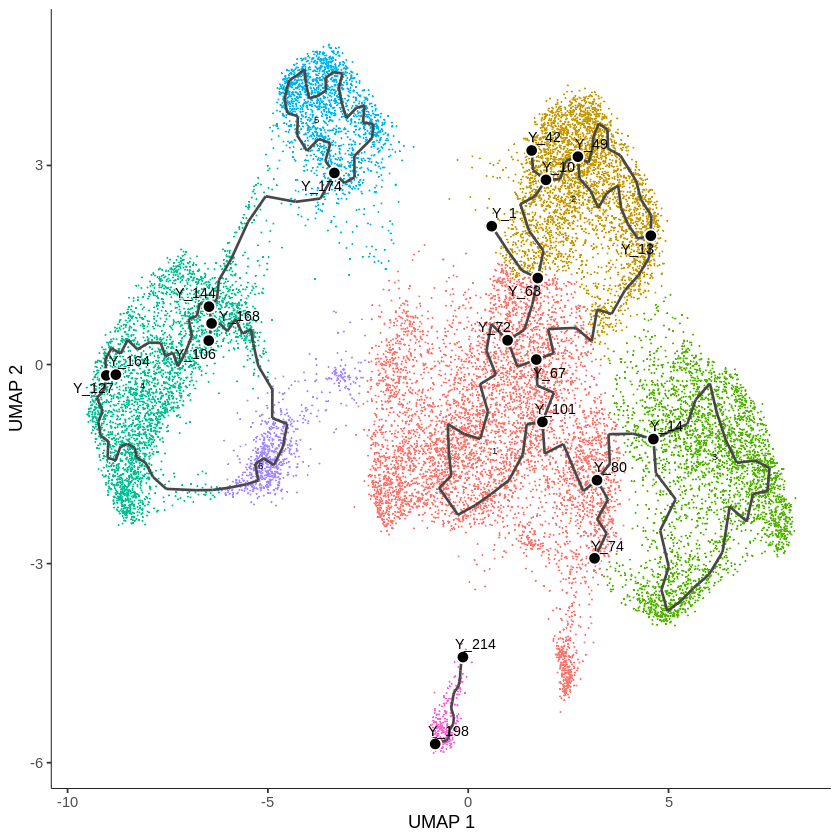

In [31]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  show_trajectory_graph = TRUE, label_principal_points = TRUE
)

In [32]:
# order cells
# interactive more or not
if (order_f == ""){
   se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_pr_nodes = c('Y_168','Y_157')) 
}else{
    se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_cells = hsc)
}

Cells aren't colored in a way that allows them to be grouped.

Saving 6.67 x 6.67 in image



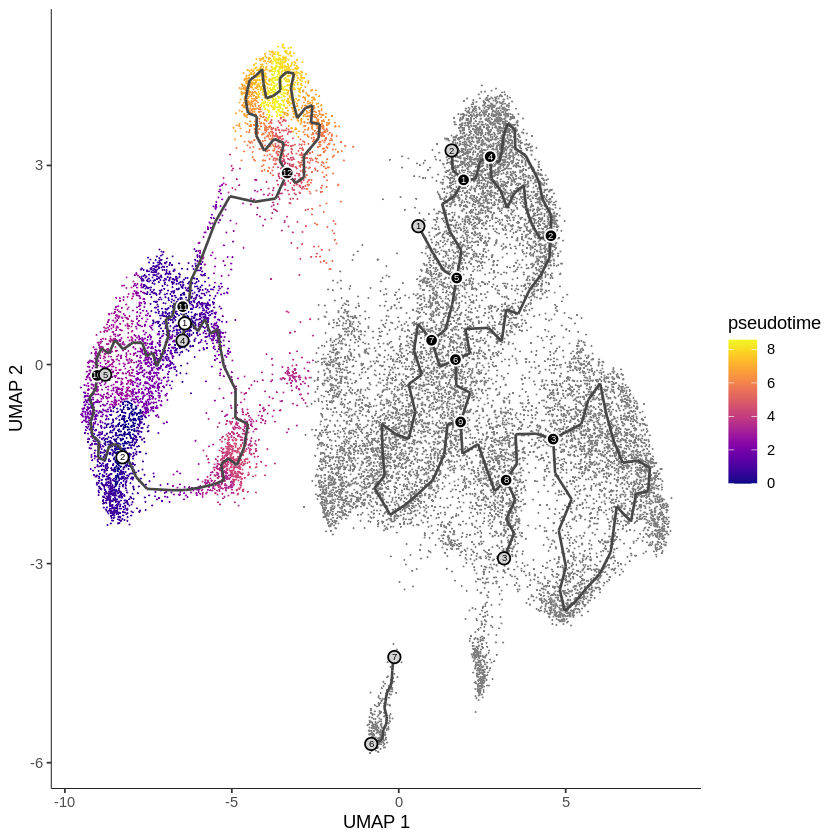

In [33]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  color_cells_by = "pseudotime",
  show_trajectory_graph = TRUE
)
ggsave(file.path(outdir, "SE.pseudotime.trajectory.png"))


In [11]:
se <- AddMetaData(
  object = se,
  metadata = se.cds@principal_graph_aux@listData$UMAP$pseudotime,
  col.name = "pseudotime"
)


In [12]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,pseudotime
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<int>,<chr>,<I<chr>>,<fct>,<fct>,<fct>,<fct>,<dbl>
Control_AAACGAAAGAATCAGT-1,Control,1972,1972,6432,1259,31,19,266,1066,3791,⋯,6,2211,1942,AAACGAAAGAATCAGT-1_Control,Control_AAACGAAAGAATCAGT-1,4,1,Control,1_4,21.3854598
Control_AAACGAAAGCATACCT-1,Control,2674,2674,11858,1937,51,34,549,3102,6185,⋯,7,3311,2750,AAACGAAAGCATACCT-1_Control,Control_AAACGAAAGCATACCT-1,30,1,Control,1_30,7.0874378
Control_AAACGAAAGCGAGAAA-1,Control,1939,1939,7365,1097,25,27,275,2184,3757,⋯,7,2112,1838,AAACGAAAGCGAGAAA-1_Control,Control_AAACGAAAGCGAGAAA-1,15,0,Control,0_15,2.4482526
Control_AAACGAAAGTACAGAT-1,Control,862,862,4095,861,16,16,230,771,2201,⋯,4,1441,1317,AAACGAAAGTACAGAT-1_Control,Control_AAACGAAAGTACAGAT-1,9,0,Control,0_9,14.8856899
Control_AAACGAAAGTACAGTA-1,Control,1775,1775,8088,1091,27,27,369,2157,4417,⋯,6,2385,2085,AAACGAAAGTACAGTA-1_Control,Control_AAACGAAAGTACAGTA-1,17,1,Control,1_17,21.4327756
Control_AAACGAAAGTGTCGGA-1,Control,756,756,3362,524,15,12,154,836,1821,⋯,4,1133,1068,AAACGAAAGTGTCGGA-1_Control,Control_AAACGAAAGTGTCGGA-1,3,1,Control,1_3,12.1917311
Control_AAACGAACACTCGCAG-1,Control,1444,1444,6285,831,22,23,319,1872,3218,⋯,1,1855,1658,AAACGAACACTCGCAG-1_Control,Control_AAACGAACACTCGCAG-1,21,0,Control,0_21,10.9396474
Control_AAACGAAGTCTTAGCA-1,Control,1921,1921,10456,1353,31,23,417,3769,4863,⋯,4,2918,2480,AAACGAAGTCTTAGCA-1_Control,Control_AAACGAAGTCTTAGCA-1,20,1,Control,1_20,13.2182983
Control_AAACGAAGTGAGGGTT-1,Control,425,425,1347,226,5,9,48,307,752,⋯,9,439,426,NA,Control_AAACGAAGTGAGGGTT-1,None,None,None,None,0.6536138


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



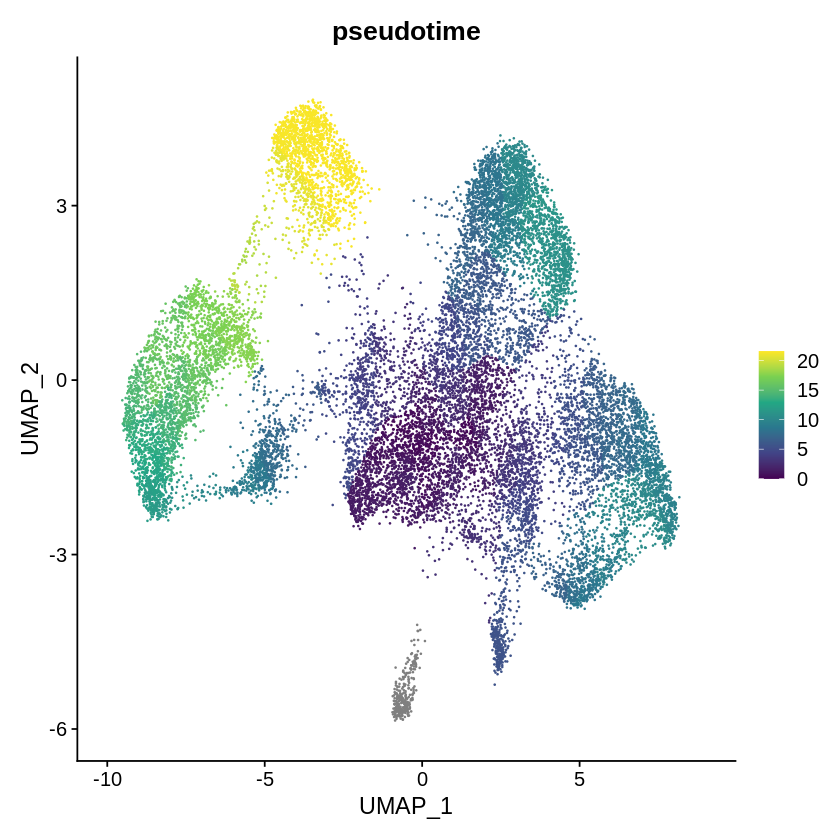

Saving 6.67 x 6.67 in image



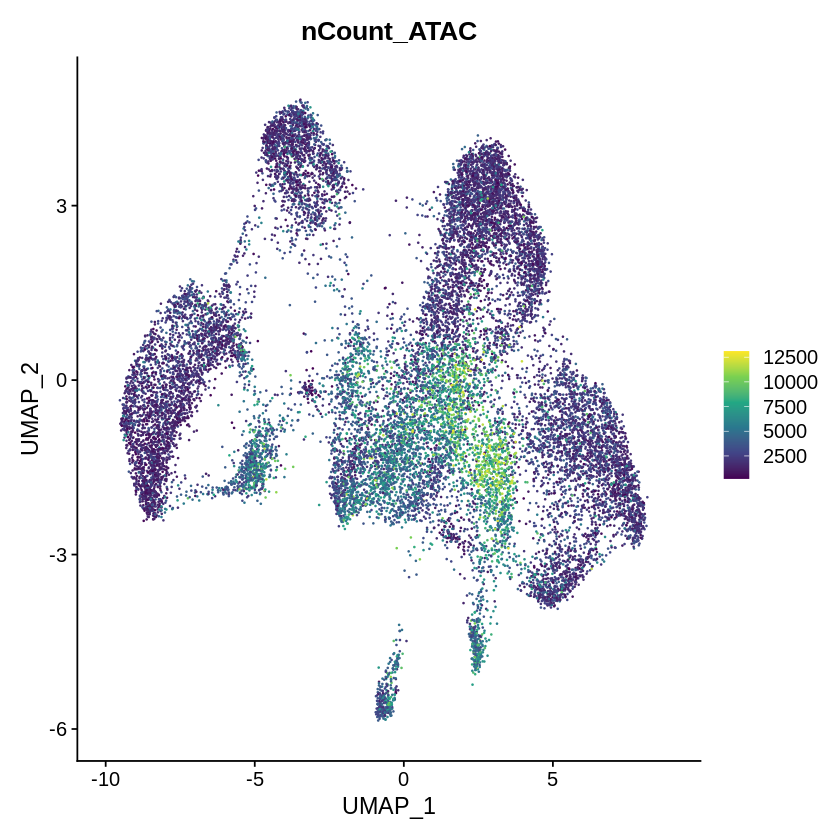

In [14]:
FeaturePlot(se, c("pseudotime"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.png"))
FeaturePlot(se, c("nCount_ATAC"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.nCountPeaks.png"))




In [16]:
de_res <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 16)

  |====================================================| 100%, Elapsed 03:26:13


In [17]:
de_res

,status,p_value,morans_test_statistic,morans_I,q_value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1-9866-10638,OK,5.843189e-01,-0.21295473,-0.0004753970,7.720895e-01
chr1-16106-16366,OK,3.339402e-01,0.42905887,0.0008422356,5.746084e-01
chr1-180724-181403,OK,7.610170e-01,-0.70957770,-0.0013761740,8.194929e-01
chr1-184126-184527,OK,8.034324e-01,-0.85394534,-0.0018536301,8.397417e-01
chr1-191059-192097,OK,4.132255e-05,3.93659735,0.0083211637,3.124669e-04
chr1-267765-268275,OK,9.501855e-01,-1.64665531,-0.0035365168,9.520627e-01
chr1-271046-271568,OK,2.375197e-03,2.82348981,0.0058928025,1.160418e-02
chr1-274282-274375,OK,5.768281e-01,-0.19378567,-0.0004439098,7.707084e-01
chr1-585929-586429,OK,3.277703e-07,4.97409234,0.0091918776,3.551386e-06


In [19]:
write.table(de_res, file.path(outdir, "branch.de.atac.tsv"),quote = FALSE, sep="\t")

In [20]:
se.cds

class: cell_data_set 
dim: 202365 18672 
metadata(1): citations
assays(2): counts logcounts
rownames(202365): chr1-9866-10638 chr1-16106-16366 ...
  chrY-21459911-21460270 chrY-21580389-21580825
rowData names(0):
colnames(18672): Control_AAACGAAAGAATCAGT-1 Control_AAACGAAAGCATACCT-1
  ... Input_TTTGTGTTCGGGACAA-1 Input_TTTGTGTTCTGGCACG-1
colData names(41): orig.ident nCount_ATAC ... ident Size_Factor
reducedDimNames(2): INTEGRATED_LSI UMAP
mainExpName: ATAC
altExpNames(0):

In [16]:
#de_res_rna <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 16)

  |====================================================| 100%, Elapsed 03:26:13


In [22]:
saveRDS(se, file.path(outdir, "SE.pseudotime.rds"))

In [12]:
# de_res <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 3)

# genes_plt <- c("Ube2c", "Mrps12", "Hspa12a", "Igfbp3")
# plot_cells(cds, genes = genes_plt,
#            show_trajectory_graph = FALSE,
#            label_cell_groups = FALSE,
#            label_leaves = FALSE)

ERROR: Error: 'rBind' is defunct.
 Since R version 3.2.0, base's rbind() should work fine with S4 objects


## Pseudotime DE
https://broadinstitute.github.io/2019_scWorkshop/functional-pseudotime-analysis.html

In [24]:
se[]

An object of class Seurat 
221404 features across 18672 samples within 2 assays 
Active assay: ATAC (202365 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: integrated_lsi, umap

In [27]:
se[["seurat_clusters"]]

,seurat_clusters
,<fct>
Control_AAACGAAAGAATCAGT-1,6
Control_AAACGAAAGCATACCT-1,7
Control_AAACGAAAGCGAGAAA-1,7
Control_AAACGAAAGTACAGAT-1,4
Control_AAACGAAAGTACAGTA-1,6
Control_AAACGAAAGTGTCGGA-1,4
Control_AAACGAACACTCGCAG-1,1
Control_AAACGAAGTCTTAGCA-1,4
Control_AAACGAAGTGAGGGTT-1,9


In [28]:
colData(se.cds)$cluster_labels <- se[["seurat_clusters"]]


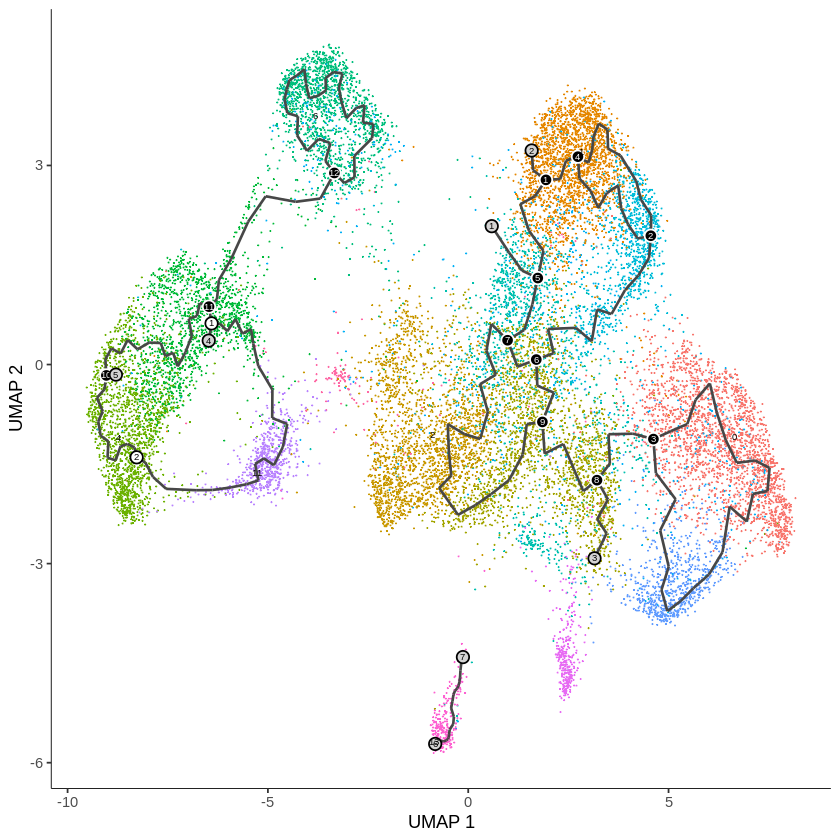

In [34]:
#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
plot_cells(se.cds, color_cells_by="seurat_clusters")

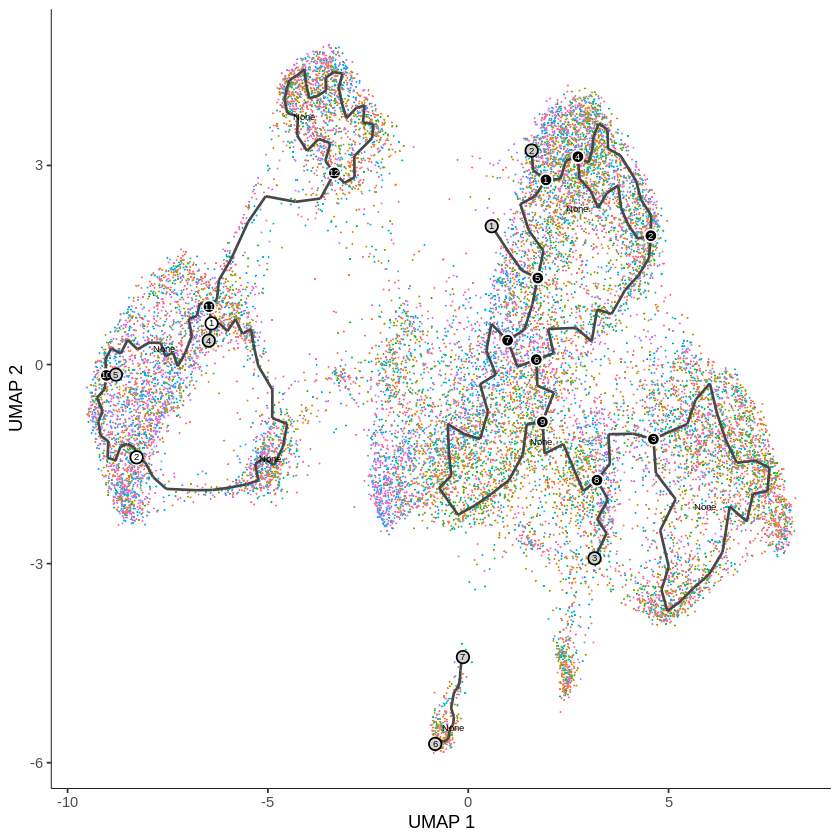

In [35]:
#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
plot_cells(se.cds, color_cells_by="name")

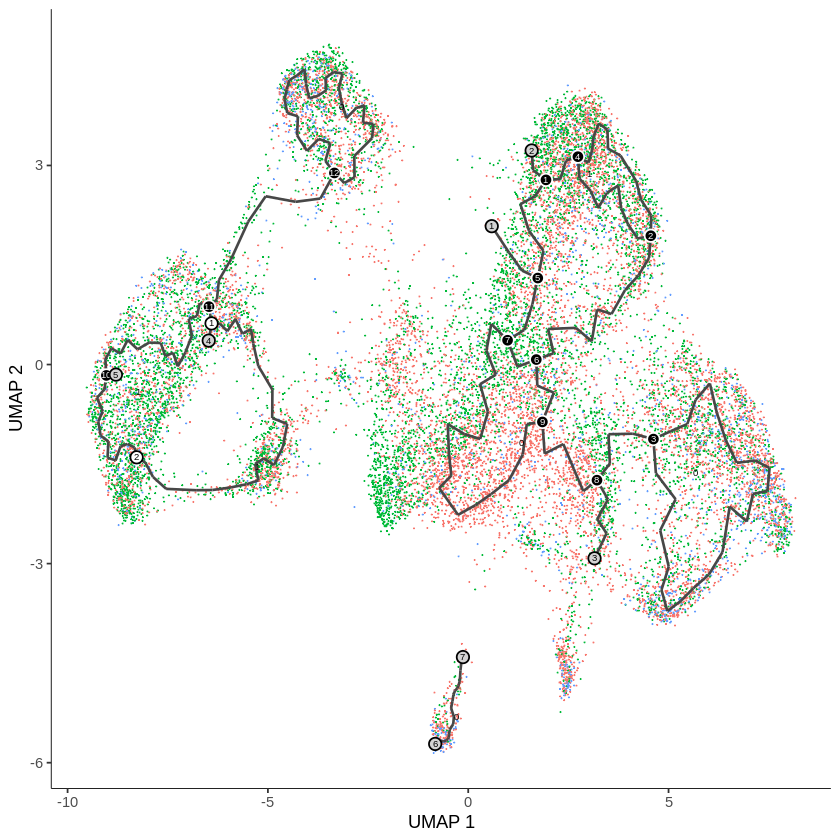

In [36]:
#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
plot_cells(se.cds, color_cells_by="donor")